In [31]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
#from netCDF4 import Dataset

import re
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import numpy
import matplotlib.pyplot as plt
% matplotlib inline

In [32]:
file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/updated_lon.dat')
line_content = file_source.readlines()

In [33]:
def context2array(context):
    return np.matrix([map(float, re.split('\s+', ln.strip()))
      for ln in context.splitlines() if ln.strip()])

In [34]:
lon_ice=np.empty([10,464])

In [35]:
for j in range(0, 464):
     lon_ice[:,j] = context2array(line_content[j])

In [36]:
shape = ( 80, 58 )
lon2_ice=lon_ice.reshape(shape)

In [37]:
file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/updated_lat.dat')
line_content = file_source.readlines()
lat_ice=np.empty([10,464])
for j in range(0, 464):
     lat_ice[:,j] = context2array(line_content[j])
lat2_ice=lat_ice.reshape(shape)

In [38]:
file_source = open('/ocean/xiaoxiny/research/data/findk/ice_concentration/ice_2.dat')
line_content = file_source.readlines()
ice=np.empty([80,58])
for j in range(1, 58):
     ice[:,j] = context2array(line_content[j])

In [39]:
print lon2_ice.shape
#print lat2_ice.shape
#lon2_ice=lon2_ice-180
#print np.max(lon2_ice)
#print np.min(lon2_ice)

(80, 58)


In [40]:
'First input'
#input
input_lat=[53,53]
input_lon=[164,-157+360]#if lon is less than 0, then +360

In [41]:

#for i in range(80):
#    for j in range(58):
#        if lat2_ice[i,j]>(input_lat-.5) and lat2_ice[i,j]<(input_lat+.5):
#            #print ('Found location:%s,%s'%(lon2_ice[i,j],lat2_ice[i,j]))
#            if lon2_ice[i,j]>(input_lon-.73) and lon2_ice[i,j]<(input_lon+.73):
#                print ('position:%s,%s'%(i,j))
#                print ('Ouput:%s,%s'%(lon2_ice[i,j],lat2_ice[i,j]))
#                print ('Input:%s,%s'%(input_lon,input_lat))
#                loc_i=i
#                loc_j=j
            #else:
            #    print(':(')

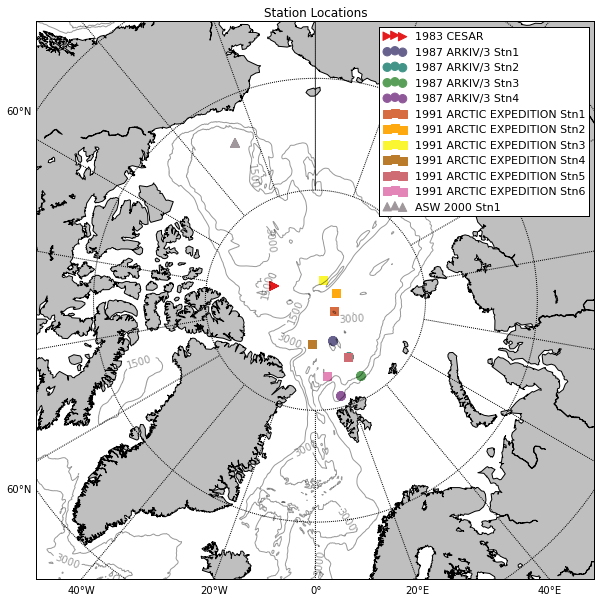

In [42]:
import matplotlib.cm as cm
from netCDF4 import Dataset

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
file_num=12
marker=['>','o','o','o','o','s','s','s','s','s','s','^']
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.Set1(j*23),marker=marker[j],s=70,label=name)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()

In [43]:
print lon2_ice.shape,lat2_ice.shape

(80, 58) (80, 58)


In [85]:
# test function
def drawmap(input_lon,input_lat,color):
    fig = plt.figure(figsize=(15,15))
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
    m.drawcoastlines()

    m.fillcontinents(color = '0.95')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

    x,y= m(lon2_ice,lat2_ice)
    m.scatter(x,y,alpha=0.5)
    #m.scatter(x[loc_i,:],y[loc_i,:],color='yellow')
    #m.scatter(x[:,loc_j],y[:,loc_j],color='yellow')
    #cs=m.pcolor(x,y,lon2_ice)
    #CBar = plt.colorbar(cs, shrink=0.8)
    #x_test,y_test= m(lon2_ice[loc_i,loc_j],lat2_ice[loc_i,loc_j])
    #m.scatter(x_test,y_test,color='yellow',s=100)
    
    m.scatter(x[input_lon,input_lat],y[input_lon,input_lat],c=color,s=200)
    m.scatter(x[:,1],y[:,1],s=50,color='b',alpha=0.5)
    m.scatter(x[:,2],y[:,2],s=50,color='r',alpha=0.5)
    m.scatter(x[:,3],y[:,3],s=50,color='g',alpha=0.5)
    m.scatter(x[:,4],y[:,4],s=50,color='cyan',alpha=0.5)
    m.scatter(x[:,5],y[:,5],s=50,color='pink',alpha=0.5)
    m.scatter(x[:,6],y[:,6],s=50,color='Cornsilk',alpha=0.5)
    m.scatter(x[:,7],y[:,7],s=50,color='Honeydew',alpha=0.5)
    m.scatter(x[:,8],y[:,8],s=50,color='DarkSlateGray',alpha=0.5)
    
    m.scatter(x[1,:],y[1,:],s=50,color='yellow',alpha=0.5)
    m.scatter(x[2,:],y[2,:],s=50,color='orange',alpha=0.5)
    m.scatter(x[3,:],y[3,:],s=50,color='purple',alpha=0.5)
    m.scatter(x[-1,:],y[-1,:],s=50,color='grey',alpha=0.5)
    
    


    for j in range(file_num):
        data=pd.read_csv(nc_filename[j])
        lon = data['long.'];
        name= data['name'][0];
        lat = data['lat.'];
        x,y = m(lon.values,lat.values)
        m.scatter(x[0],y[0],c=cm.Set1(j*25),marker=marker[j],s=100,label=name)

    plt.title("Grid Points")
    plt.legend(loc=1,fontsize=11,scatterpoints=1)
    plt.show()

In [87]:
print input_x
print input_y

[35, 67, 19, 2, 74, 10, 66, 58, 34, 26, 28]
[45, 5, 13, 40, 23, 32, 31, 47, 55, 55, 50]


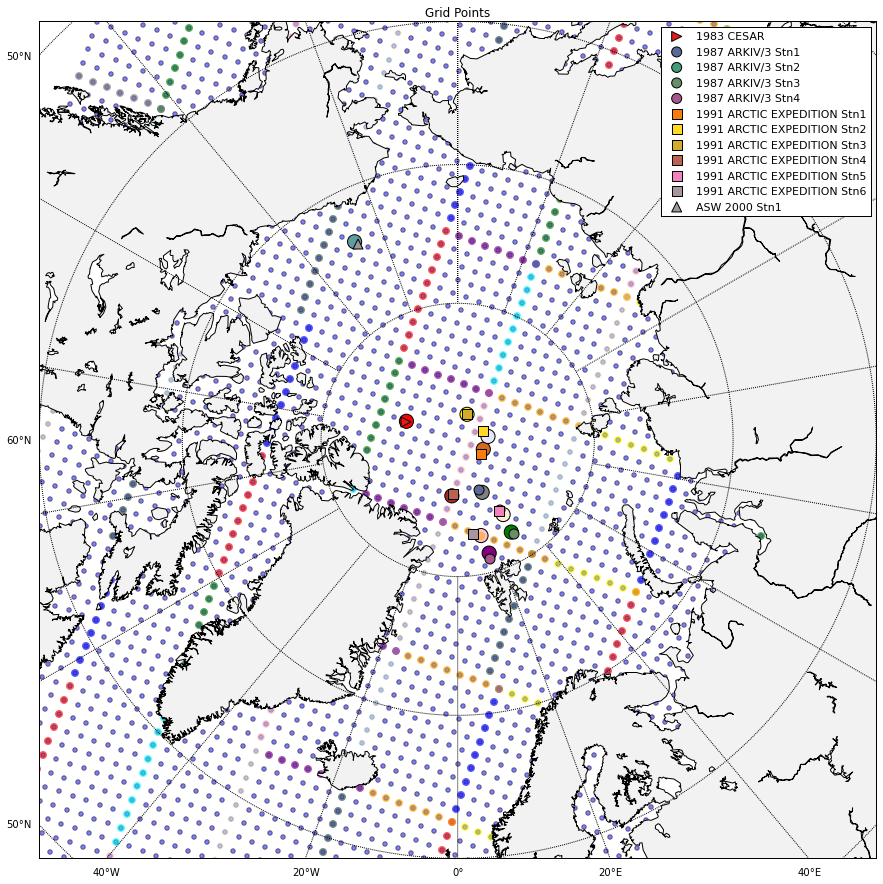

In [86]:
input_x=[32+3,8*8+3,19,2    ,2+9*8,2+8*1,2+8*8,2+7*8,2+4*8,2+3*8,4+3*8]
input_y=[40+5,5,    13,4*8+8,7+2*8,8+3*8,7+3*8,7+5*8,7+6*8,7+6*8,2+6*8]

# the numbers above are useless

color=['red','brown','yellow','pink','green','purple','PapayaWhip','grey','chocolate','Lavender','CadetBlue']

drawmap(input_x,input_y,color)

In [149]:
def hanglie(j,i):#j=lie;i=hang
    '''
    define a fucntion to calculate the averge sea ice concentration
    '''
    array=np.empty([len(filename),5])#CEN, UP, DOWN, LEFT, RIGHT
    for k in range(len(filename)):
        file_source=open(filename[k])
        line_content = file_source.readlines()
        split=map(''.join, zip(*[iter(line_content[i])]))
        if split[j]=='*':
            split[j]=10
        if split[j]=='.':
            split[j]=-1
        array[k,0]=split[j]
        if split[j+1]=='*':
            split[j+1]=10
        if split[j+1]=='.':
            split[j+1]=-1
        array[k,3]=split[j+1]
        if split[j-1]=='*':
            split[j-1]=10
        if split[j-1]=='.':
            split[j-1]=-1
        array[k,4]=split[j-1]
        
        
        split=map(''.join, zip(*[iter(line_content[i+1])]))
        if split[j]=='*':
            split[j]=10
        if split[j]=='.':
            split[j]=-1
        array[k,1]=split[j]
        
        split=map(''.join, zip(*[iter(line_content[i-1])]))
        if split[j]=='*':
            split[j]=10
        if split[j]=='.':
            split[j]=-1
        array[k,2]=split[j]
        
        
        print('Time:%s,      sea ice con.:%s'%(filename[k][-7:],array[k,:]))
    print ('Average sea ice concentration:%s' %(sum(array)/float(len(filename)*5)))
    aver=np.average(array,axis=1)
    indx=np.where(aver==aver.min())[0][0]
    print ('Lowest sea ice con. %s, in :%s'%(aver.min(),filename[indx][-7:]))

In [151]:
'Second input'
#1:   1983 CESAR
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/81~3/*'))
hanglie(j=34,i=28)

Time:1981_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1981_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:981_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1981_8,      sea ice con.:[  9.   9.   8.  10.   8.]
Time:/1981_9,      sea ice con.:[  9.   9.  10.  10.  10.]
Time:/1982_1,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1982_10,      sea ice con.:[ 10.  10.   9.  10.   9.]
Time:1982_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:982_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1982_2,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1982_3,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1982_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1982_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1982_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1982_7,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:/1982_8,      sea ice con.:[ 9.  9.  8.  8.  9.]
Time:/1982_9,      sea ice con.:[ 9.  9.  8.  8.  8.]
Time:/1

In [152]:
#2:   1987 Stn1
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/*198*'))
hanglie(j=37,i=21)

Time:1985_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1985_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1985_12,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1985_9,      sea ice con.:[ 8.  8.  8.  8.  8.]
Time:/1986_1,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1986_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1986_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1986_12,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:/1986_2,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_3,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_7,      sea ice con.:[ 9.  9.  9.  8.  9.]
Time:/1986_8,      sea ice con.:[ 9.  9.  9.  8.  9.]
Time:/1986_9,      sea ice con.:[  9.   9.   9.  10.   9.]
Time:/1987_1,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1987_2

In [153]:
#3:   1987 Stn2  
hanglie(j=38,i=19)

Time:1985_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1985_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1985_12,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1985_9,      sea ice con.:[ 9.  9.  8.  9.  8.]
Time:/1986_1,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1986_10,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:1986_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1986_12,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:/1986_2,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_3,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_6,      sea ice con.:[ 10.   9.  10.  10.  10.]
Time:/1986_7,      sea ice con.:[ 8.  8.  8.  8.  8.]
Time:/1986_8,      sea ice con.:[ 8.  8.  8.  8.  8.]
Time:/1986_9,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:/1987_1,      sea ice con.:[  9.   9.  10.   9.   9.]
Time:/1987_2,      sea ice 

In [154]:
#4:   1987 Stn3
hanglie(j=39,i=18)

Time:1985_10,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:1985_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1985_12,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1985_9,      sea ice con.:[ 8.  9.  6.  8.  8.]
Time:/1986_1,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1986_10,      sea ice con.:[ 9.  9.  8.  8.  9.]
Time:1986_11,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:1986_12,      sea ice con.:[  9.   9.  10.   8.   9.]
Time:/1986_2,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_3,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_7,      sea ice con.:[ 8.  8.  7.  7.  8.]
Time:/1986_8,      sea ice con.:[ 8.  8.  8.  8.  8.]
Time:/1986_9,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:/1987_1,      sea ice con.:[ 10.   9.  10.   8.  10.]
Time:/1987_2,      sea

In [155]:
#5:   1987 Stn4 
hanglie(j=41,i=19)

Time:1985_10,      sea ice con.:[ 9.  9.  7.  7.  9.]
Time:1985_11,      sea ice con.:[  9.  10.   7.   7.  10.]
Time:1985_12,      sea ice con.:[  9.  10.   7.   7.  10.]
Time:/1985_9,      sea ice con.:[ 8.  8.  5.  5.  8.]
Time:/1986_1,      sea ice con.:[  9.  10.   8.   7.  10.]
Time:1986_10,      sea ice con.:[ 8.  9.  6.  7.  9.]
Time:1986_11,      sea ice con.:[  9.  10.   8.   7.  10.]
Time:1986_12,      sea ice con.:[ 8.  8.  6.  6.  8.]
Time:/1986_2,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_3,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:/1986_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1986_5,      sea ice con.:[ 10.  10.   9.   8.  10.]
Time:/1986_6,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:/1986_7,      sea ice con.:[ 7.  8.  5.  5.  8.]
Time:/1986_8,      sea ice con.:[ 7.  7.  5.  5.  8.]
Time:/1986_9,      sea ice con.:[ 10.  10.   8.   8.  10.]
Time:/1987_1,      sea ice con.:[ 8.  9.  6.  7.  9.]
Time:/1987_2,      sea ice con.:

In [156]:
#6 1991 stn 1
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/91/*'))
hanglie(j=34,i=22)

Time:1989_10,      sea ice con.:[ 9.  9.  8.  9.  9.]
Time:1989_11,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:989_12 ,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:/1989_8,      sea ice con.:[ 8.  8.  6.  8.  8.]
Time:/1989_9,      sea ice con.:[ 8.  8.  7.  8.  8.]
Time:/1990_1,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:1990_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1990_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:990_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_2,      sea ice con.:[ 9.  9.  9.  8.  9.]
Time:/1990_3,      sea ice con.:[ 10.  10.   9.   9.  10.]
Time:/1990_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_7,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_8,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:/1990_9,      sea ice con.:[  9.   9.  10.   9.   9.]
Time:/1991_1,      sea

In [157]:
#7 1991 stn 2
hanglie(j=33,i=23)

Time:1989_10,      sea ice con.:[  9.   8.   9.   9.  10.]
Time:1989_11,      sea ice con.:[ 10.   9.  10.  10.  10.]
Time:989_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1989_8,      sea ice con.:[ 8.  8.  8.  8.  8.]
Time:/1989_9,      sea ice con.:[ 8.  8.  8.  8.  7.]
Time:/1990_1,      sea ice con.:[  9.   9.   9.   9.  10.]
Time:1990_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1990_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:990_12 ,      sea ice con.:[ 10.   8.  10.  10.  10.]
Time:/1990_2,      sea ice con.:[  9.  10.   9.   9.  10.]
Time:/1990_3,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_7,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_8,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_9,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:/1991_1

In [158]:
#8 1991 stn 3
hanglie(j=32,i=24)

Time:1989_10,      sea ice con.:[  9.   9.  10.   8.  10.]
Time:1989_11,      sea ice con.:[ 10.   9.  10.   9.  10.]
Time:989_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1989_8,      sea ice con.:[ 10.  10.   8.   8.  10.]
Time:/1989_9,      sea ice con.:[ 7.  7.  7.  8.  8.]
Time:/1990_1,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:1990_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1990_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:990_12 ,      sea ice con.:[  9.  10.  10.   8.   9.]
Time:/1990_2,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_3,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_5,      sea ice con.:[ 10.   9.  10.  10.  10.]
Time:/1990_6,      sea ice con.:[  9.  10.  10.  10.   9.]
Time:/1990_7,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_8,      sea ice con.:[ 10.   9.  10.  10.  10.]
Time:/1990_9,      sea ice con.:[ 8.  8.  9.  9.  8.]
Time:/1

In [159]:
#9 1991 stn 4
hanglie(j=38,i=23)

Time:1989_10,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:1989_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:989_12 ,      sea ice con.:[ 10.  10.  10.  10.   9.]
Time:/1989_8,      sea ice con.:[ 8.  8.  9.  9.  7.]
Time:/1989_9,      sea ice con.:[ 8.  8.  8.  8.  8.]
Time:/1990_1,      sea ice con.:[ 8.  9.  9.  9.  9.]
Time:1990_10,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1990_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:990_12 ,      sea ice con.:[  9.  10.   9.  10.   9.]
Time:/1990_2,      sea ice con.:[  9.   9.   9.  10.   9.]
Time:/1990_3,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:/1990_4,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:/1990_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_7,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:/1990_8,      sea ice con.:[ 8.  9.  9.  7.  8.]
Time:/1990_9,      sea ice con.:[  9.  10.   9.   9.   9.]
Time:/1991_1,      sea

In [160]:
#10 1991 stn 5
hanglie(j=38,i=19)

Time:1989_10,      sea ice con.:[ 8.  9.  8.  9.  8.]
Time:1989_11,      sea ice con.:[ 8.  9.  9.  8.  8.]
Time:989_12 ,      sea ice con.:[ 10.  10.  10.  10.   9.]
Time:/1989_8,      sea ice con.:[ 7.  7.  8.  8.  6.]
Time:/1989_9,      sea ice con.:[ 7.  8.  7.  8.  7.]
Time:/1990_1,      sea ice con.:[  9.   9.  10.   9.   9.]
Time:1990_10,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:1990_11,      sea ice con.:[ 10.   9.  10.   9.  10.]
Time:990_12 ,      sea ice con.:[  9.   9.  10.   9.  10.]
Time:/1990_2,      sea ice con.:[ 10.   9.  10.   9.  10.]
Time:/1990_3,      sea ice con.:[ 10.   9.  10.   9.  10.]
Time:/1990_4,      sea ice con.:[ 10.   9.  10.  10.   9.]
Time:/1990_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_7,      sea ice con.:[ 9.  9.  9.  9.  9.]
Time:/1990_8,      sea ice con.:[ 8.  9.  8.  9.  8.]
Time:/1990_9,      sea ice con.:[ 8.  8.  7.  8.  8.]
Time:/1991_1,      sea ice con.:[ 10.

In [161]:
#11 1991 stn 6
hanglie(j=40,i=21)

Time:1989_10,      sea ice con.:[ 10.  10.  10.  10.   9.]
Time:1989_11,      sea ice con.:[ 9.  9.  8.  9.  9.]
Time:989_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1989_8,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:/1989_9,      sea ice con.:[ 10.   9.   9.  10.   9.]
Time:/1990_1,      sea ice con.:[ 8.  9.  8.  8.  9.]
Time:1990_10,      sea ice con.:[  9.  10.   9.  10.   9.]
Time:1990_11,      sea ice con.:[ 10.  10.   9.  10.  10.]
Time:990_12 ,      sea ice con.:[  9.  10.   9.  10.   9.]
Time:/1990_2,      sea ice con.:[  9.  10.   9.   9.   9.]
Time:/1990_3,      sea ice con.:[  9.  10.   9.   9.   9.]
Time:/1990_4,      sea ice con.:[ 10.  10.   9.  10.   9.]
Time:/1990_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_6,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1990_7,      sea ice con.:[ 8.  8.  8.  6.  9.]
Time:/1990_8,      sea ice con.:[ 8.  7.  9.  6.  9.]
Time:/1990_9,      sea ice con.:[ 9.  9.  8.  8.  9.]
Time:/1991_1,      sea

In [162]:
#12 2000 stn 1
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/ice_concentration/00/*'))
hanglie(j=23,i=35)

Time:1998_10,      sea ice con.:[ 2.  0.  3.  6.  0.]
Time:1998_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:998_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1998_8,      sea ice con.:[ 0.  0.  0.  0.  0.]
Time:/1998_9,      sea ice con.:[ 0.  0.  0.  0.  0.]
Time:/1999_1,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:1999_10,      sea ice con.:[ 10.  10.  10.  10.   9.]
Time:1999_11,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:999_12 ,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1999_2,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1999_3,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1999_4,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1999_5,      sea ice con.:[ 10.  10.  10.  10.  10.]
Time:/1999_6,      sea ice con.:[ 10.  10.  10.   9.  10.]
Time:/1999_7,      sea ice con.:[ 7.  7.  7.  7.  7.]
Time:/1999_8,      sea ice con.:[ 3.  2.  3.  4.  0.]
Time:/1999_9,      sea ice con.:[ 4.  3.  5.  7.  0.]
Time:/2000_1,      sea ice 